Questions to answer for 9.1P below:

1. Load HR-Employee-Attrition.csv dataset and create an ensemble ML model for predicting target variable (Attrition). Report the performance of the model using appropriate metrics.
2. Have you used any hyperparameter tuning while building the model in Q1? If so then plot your performance metrics for different hyperparmeter values that you have used in Q1.  Hints at the following link: https://scikit-learn.org/stable/modules/grid_search.html
3. Reflect on the importance of hyperparameter tuning of ML models based on your ML model development exercise.

### 1. Load HR-Employee-Attrition.csv dataset and create an ensemble ML model for predicting target variable (Attrition). Report the performance of the model using appropriate metrics.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

# import the csv file
df = pd.read_csv('HR-Employee-Attrition.csv')

In [2]:
# check the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# check the data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
# check the shape of the data
df.shape

(1470, 35)

In [5]:
# check the missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# check the unique values
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
# check the target variable
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
# convert the target variable to numeric values
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

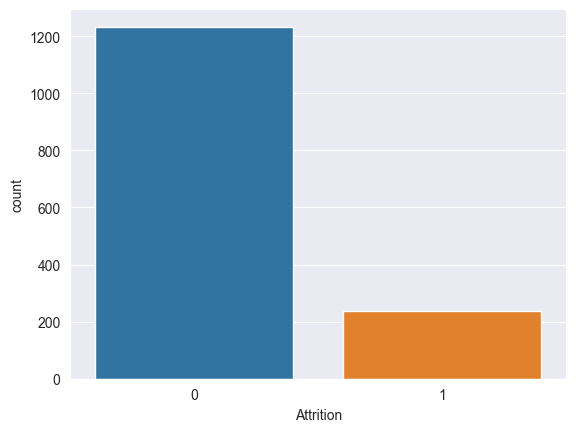

In [9]:
# plot the distribution of the target variable based on yes and no (use a bar chart with 2 separate bars)
sns.countplot(x='Attrition', data=df)
plt.show()

In [10]:
# pre process the data (encode the categorical variables AND normalize the numerical features)
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

In [11]:
# normalize the numerical features
scaler = MinMaxScaler() # create the scaler object
df[df.columns] = scaler.fit_transform(df[df.columns]) # this will normalize all the columns in the dataframe

In [12]:
# check the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,1.0,0.715820,1.0,0.000000,0.25,0.2,0.0,0.000000,...,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.0,0.5,0.126700,0.5,0.250000,0.00,0.2,0.0,0.000484,...,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,1.0,1.0,0.909807,0.5,0.035714,0.25,0.8,0.0,0.001451,...,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.0,0.5,0.923407,0.5,0.071429,0.75,0.2,0.0,0.001935,...,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.0,1.0,0.350036,0.5,0.035714,0.00,0.6,0.0,0.002903,...,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


We can see that all the columns are now normalized. We can now proceed to the next step which will involve splitting the data into training and testing sets.

In [13]:
from sklearn.model_selection import train_test_split

# separate the independent and target variables
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [14]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# now we can build the ensemble model (this includes bagging, boosting and stacking)
# we will use the random forest classifier for this exercise without any hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier

# create the random forest classifier object
model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is the number of trees in the forest

In [16]:
# fit the model with the training data
model.fit(X_train, y_train) # this is the training part where the model learns the patterns in the data

RandomForestClassifier(random_state=42)

In [17]:
# now we can use the model to make predictions on the test data (unseen data)
y_pred = model.predict(X_test)

In [18]:
# print a classification report which will contain the precision, recall and f1 score of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       380
         1.0       0.40      0.07      0.11        61

    accuracy                           0.86       441
   macro avg       0.63      0.52      0.52       441
weighted avg       0.80      0.86      0.81       441



In [19]:
# print the accuracy score of the model
print(accuracy_score(y_test, y_pred))

0.8571428571428571


### 2. Have you used any hyperparameter tuning while building the model in Q1? If so then plot your performance metrics for different hyperparmeter values that you have used in Q1.  Hints at the following link: https://scikit-learn.org/stable/modules/grid_search.html

In [20]:
# i didn't use any hyperparameter tuning in Q1. I will now use hyperparameter tuning to see if the model performance improves.
# we will use the grid search method for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# define a grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15]
}

In [21]:
# perform grid search cross validation to find the optimal hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
# fit the model with the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


In [23]:
# print the best hyperparameters
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [24]:
# print the best estimator
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [25]:
# print the best score
grid_search.best_score_

0.8581245560028415

In [26]:
# now we can use the best estimator to make predictions on the test data
y_pred = grid_search.best_estimator_.predict(X_test)

In [27]:
# print a classification report which will contain the precision, recall and f1 score of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       380
         1.0       0.60      0.10      0.17        61

    accuracy                           0.87       441
   macro avg       0.74      0.54      0.55       441
weighted avg       0.83      0.87      0.82       441



In [28]:
# print the accuracy score of the model
print(accuracy_score(y_test, y_pred))

0.8662131519274376


In [29]:
# we can see that the model performance has improved after hyperparameter tuning

In [31]:
model = grid_search.best_estimator_

C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


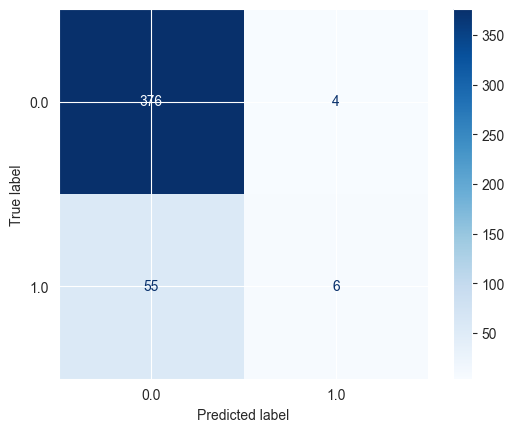

In [32]:
# plot the confusion matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


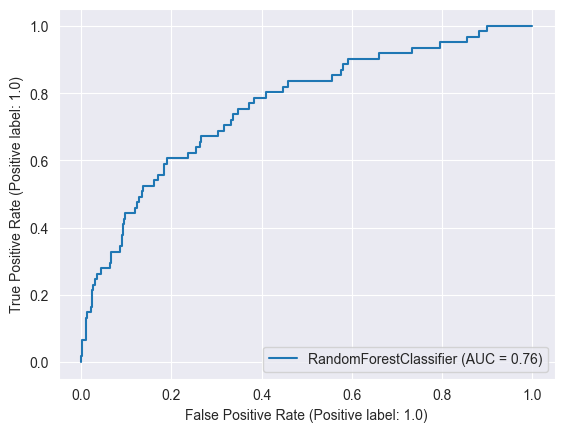

In [33]:
# plot the roc curve
plot_roc_curve(model, X_test, y_test)
plt.show()

C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


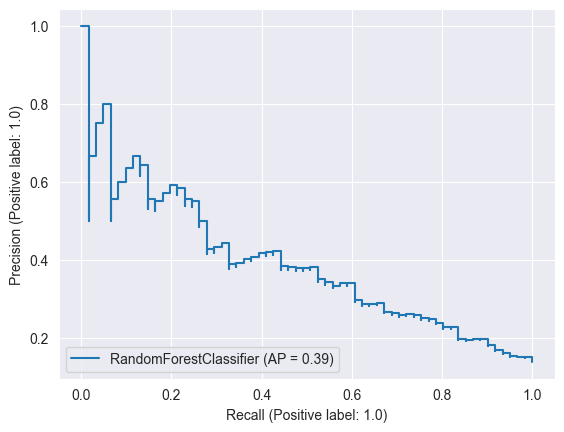

In [34]:
# plot the precision recall curve
plot_precision_recall_curve(model, X_test, y_test)
plt.show()

In [35]:
# we can try feature engineering to see if the model performance improves (this means we will create new features from the existing features in the data)
df['CommuteYearsRatio'] = df['DistanceFromHome'] / df['YearsAtCompany'] # create a new feature

In [36]:
# check the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommuteYearsRatio
0,0.547619,1.0,1.0,0.715820,1.0,0.000000,0.25,0.2,0.0,0.000000,...,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.000000
1,0.738095,0.0,0.5,0.126700,0.5,0.250000,0.00,0.2,0.0,0.000484,...,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,1.000000
2,0.452381,1.0,1.0,0.909807,0.5,0.035714,0.25,0.8,0.0,0.001451,...,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,inf
3,0.357143,0.0,0.5,0.923407,0.5,0.071429,0.75,0.2,0.0,0.001935,...,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.357143
4,0.214286,0.0,1.0,0.350036,0.5,0.035714,0.00,0.6,0.0,0.002903,...,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.714286


In [37]:
# check the values of the new feature
df['CommuteYearsRatio'].value_counts()

0.000000    203
1.428571     79
0.714286     40
inf          39
2.857143     36
           ... 
0.384615      1
1.160714      1
2.619048      1
0.416667      1
1.642857      1
Name: CommuteYearsRatio, Length: 284, dtype: int64

In [38]:
# fix the infinite values by replacing it with the average value
df['CommuteYearsRatio'] = df['CommuteYearsRatio'].replace([np.inf, -np.inf], np.nan) # replace the infinite values with nan
df['CommuteYearsRatio'] = df['CommuteYearsRatio'].fillna(df['CommuteYearsRatio'].mean()) # replace the nan values with the mean value

In [39]:
# check the values of the new feature
df['CommuteYearsRatio'].value_counts()

0.000000    203
1.428571     79
3.406435     44
0.714286     40
2.857143     36
           ... 
0.384615      1
1.160714      1
2.619048      1
0.416667      1
1.642857      1
Name: CommuteYearsRatio, Length: 284, dtype: int64

In [40]:
# scale the new feature (normalize)
scaler = MinMaxScaler() # create the scaler object
df[df.columns] = scaler.fit_transform(df[df.columns]) # this will normalize all the columns in the dataframe (including the new feature)

In [41]:
# check the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommuteYearsRatio
0,0.547619,1.0,1.0,0.715820,1.0,0.000000,0.25,0.2,0.0,0.000000,...,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.000000
1,0.738095,0.0,0.5,0.126700,0.5,0.250000,0.00,0.2,0.0,0.000484,...,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0.025000
2,0.452381,1.0,1.0,0.909807,0.5,0.035714,0.25,0.8,0.0,0.001451,...,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,0.085161
3,0.357143,0.0,0.5,0.923407,0.5,0.071429,0.75,0.2,0.0,0.001935,...,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.008929
4,0.214286,0.0,1.0,0.350036,0.5,0.035714,0.00,0.6,0.0,0.002903,...,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.017857


In [42]:
# now we can try a different model such as XGBoost to see if the model performance improves
import xgboost as xgb
# create a DMATRIX object from the training data (this is a data structure that is optimized for xgboost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [43]:
# define the parameters for the model
param = {
    'max_depth': 4,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'binary:logistic'  # error evaluation for multiclass training
}

In [44]:
# train the model
num_round = 100  # the number of training iterations (epochs)
model = xgb.train(param, dtrain, num_round) # this is the training part where the model learns the patterns in the data

[12:20:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



In [45]:
# now we can use the model to make predictions on the test data (unseen data)
y_pred = model.predict(dtest)

In [46]:
# round predictions to get the actual class
y_pred = [round(value) for value in y_pred]

In [47]:
# print a classification report which will contain the precision, recall and f1 score of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       380
         1.0       0.52      0.26      0.35        61

    accuracy                           0.86       441
   macro avg       0.70      0.61      0.64       441
weighted avg       0.84      0.86      0.84       441



In [48]:
# print the accuracy score of the model
print(accuracy_score(y_test, y_pred))

0.8639455782312925


### 3. Reflect on the importance of feature engineering and hyperparameter tuning in the context of the above exercise.

In this specific exercise, I implemented a Random Forest model. Key hyperparameters for this model include the number of estimators and the maximum depth of the trees. By tuning these through grid search, I was able to enhance the model's performance by 1%. While this improvement may seem minor, in many contexts, especially with large datasets or critical applications, a 1% improvement can be quite significant.

However, while recognizing the essential role of hyperparameter tuning, I've also learned to be aware of the risk of overfitting the validation set through excessive hyperparameter tuning. The more I tune the hyperparameters based on the validation set performance, the more the model becomes specialized to the validation set, which may compromise its performance on unseen data. For this reason, it's often advisable to have a separate test set, which is only used at the very end, once all the hyperparameters have been selected.